In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)
from plotting_utils import *
import uproot
import awkward as ak

In [2]:
input_folder = "/work/dvalsecc/Clustering/dataset/genmatching_efficiency_studies/electrons_genmatching/"
output_folder = "plots/electrons_gen_matching_v2/patElectron_mustache/"
os.makedirs(output_folder, exist_ok=True)

In [3]:
df = pd.HDFStore(f"{input_folder}/Mustache_235noise_UL18_v2.h5py", "r")["df"]
df.rename(columns={"output_object.csv":"genpart_index"}, inplace=True)
df = df.iloc[:-1]

# GenParticles

Text(0, 1, 'genPart $\\eta$')

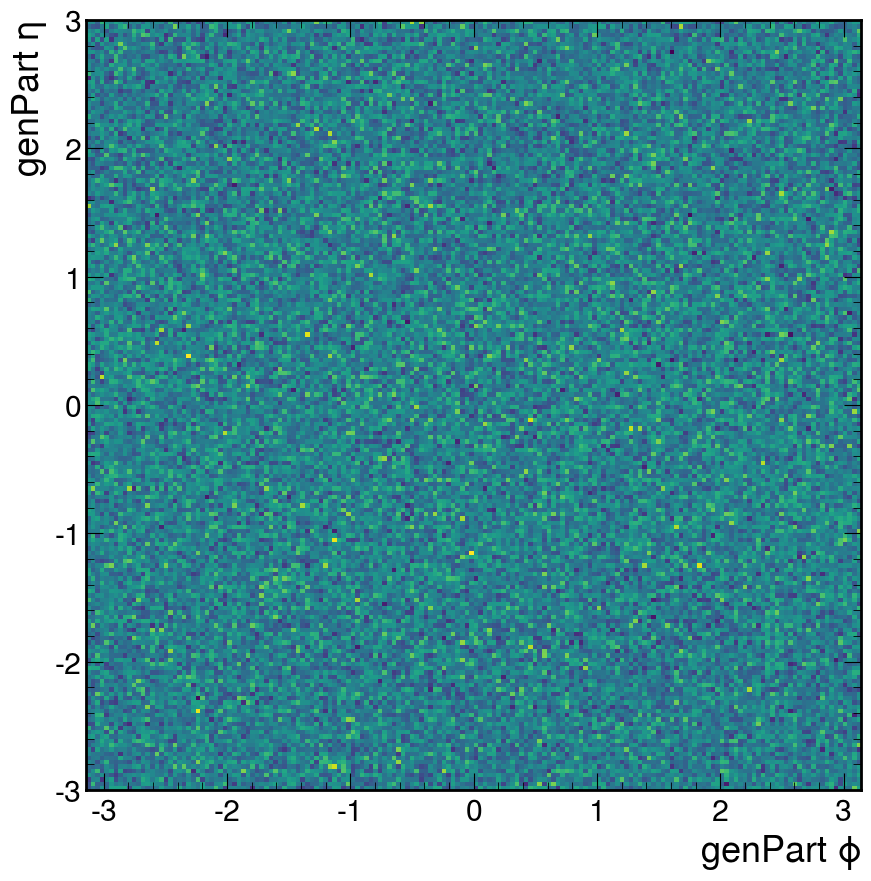

In [8]:
plt.hist2d(df.genpart_phi,df.genpart_eta,  bins=(170, 180), range=((-np.pi,np.pi),(-3,3)));
plt.xlabel("genPart $\phi$")
plt.ylabel("genPart $\eta$")

Text(1, 0, 'GenPart Et')

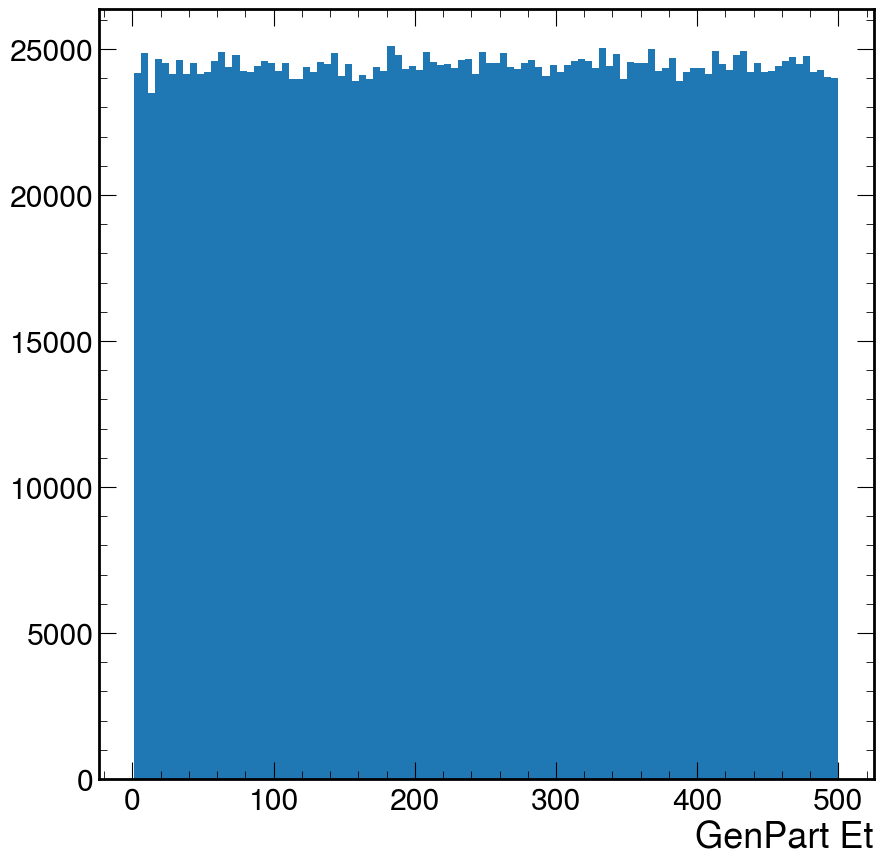

In [9]:
plt.hist(df.genpart_et, bins=100);
plt.xlabel("GenPart Et")

# SuperClusters

Taking the SC closest to the genparticle (dR < 0.2)

In [10]:
dfsc = df[df.sc_matched==1]

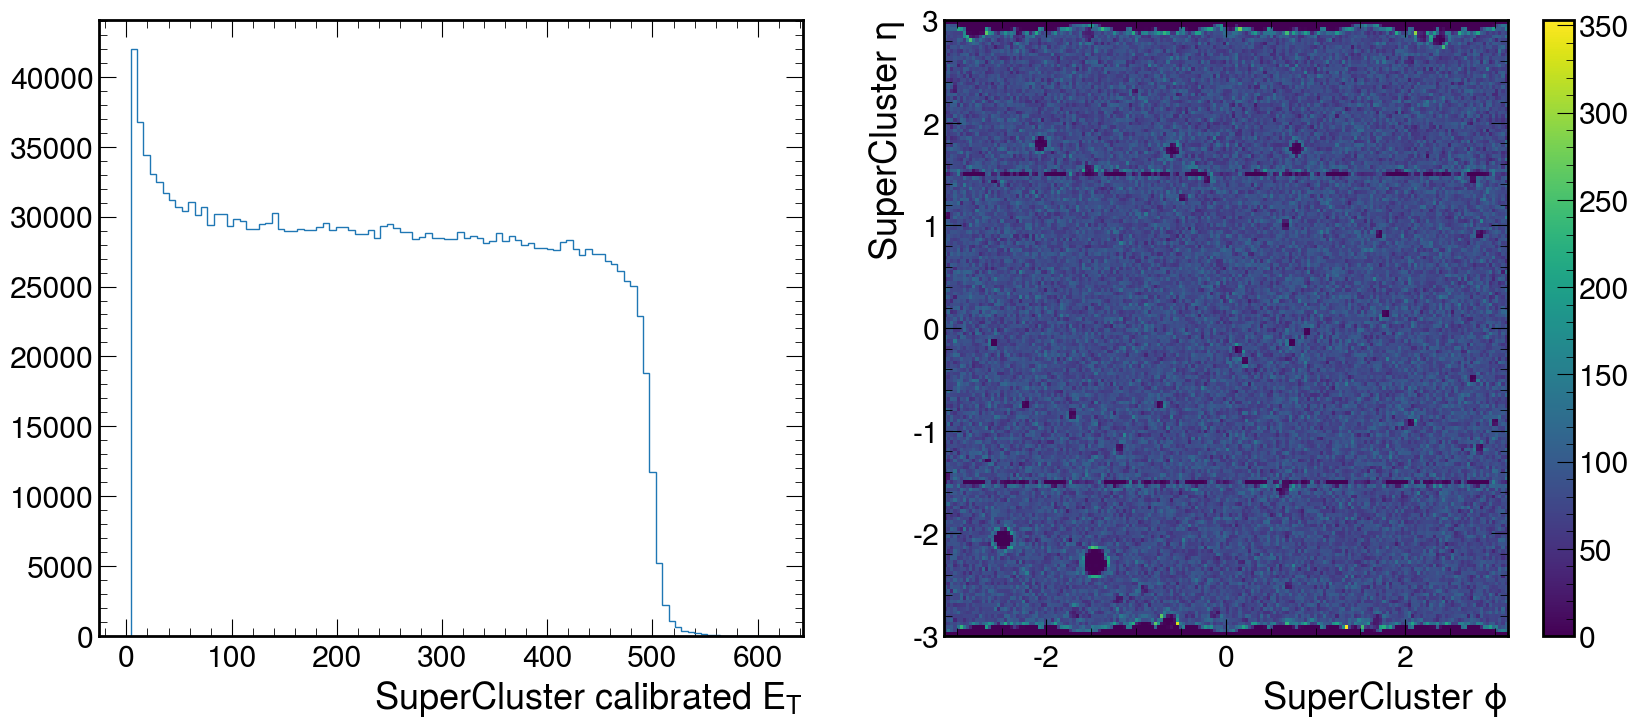

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.hist(dfsc.et_sc_calib, bins=100, histtype="step")
ax1.set_xlabel("SuperCluster calibrated $E_T$")
*b, C = ax2.hist2d(dfsc.sc_phi, dfsc.sc_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("SuperCluster $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax2)

# PatElectrons

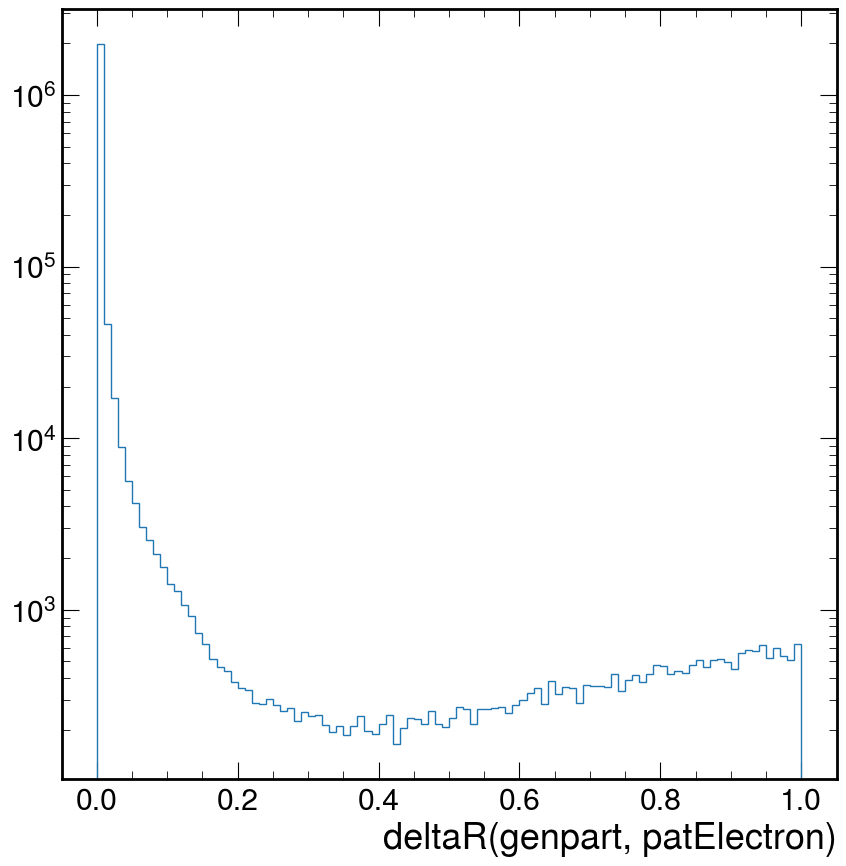

In [33]:
plt.hist(df.deltaR_genPart_ele, bins=100, range=(0,1), label="Mustache", histtype="step")
plt.xlabel("deltaR(genpart, patElectron)");
plt.yscale("log")

Applying 0.2 deltaR cut between genParticle and ele

In [34]:
dfele = df[df.deltaR_genPart_ele<0.2]

Text(1, 0, 'patEle $E_T$ / genParticle $E_T$')

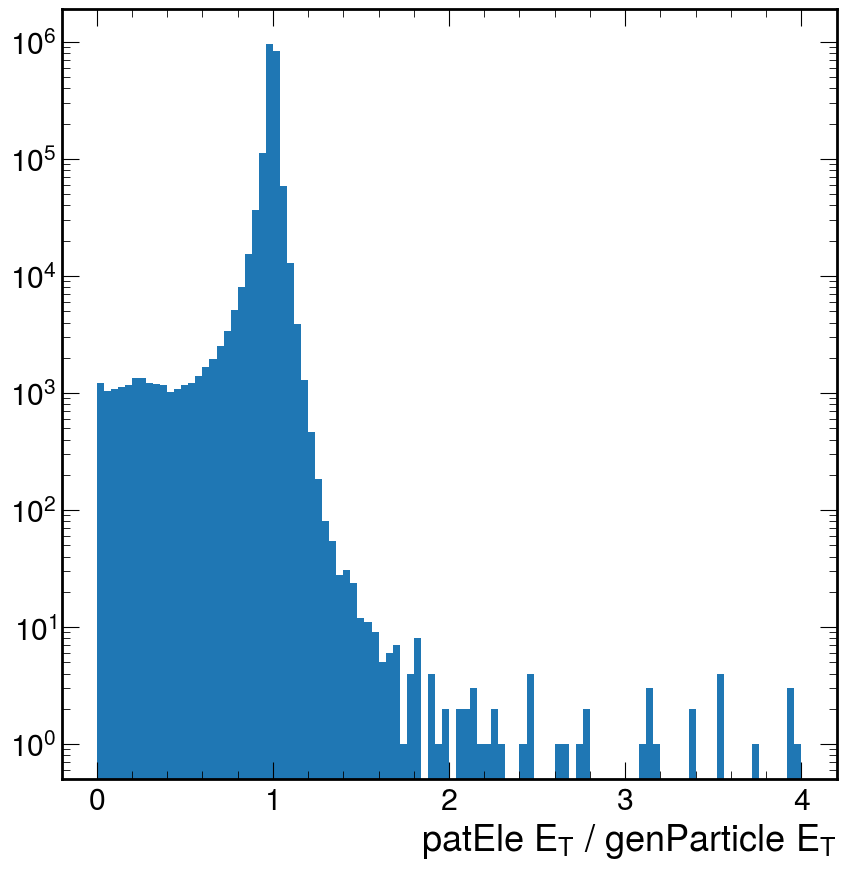

In [43]:
plt.hist(dfele.ele_et/ dfele.genpart_et, bins=100, range=(0, 4))
plt.yscale("log")
plt.xlabel("patEle $E_T$ / genParticle $E_T$")

## Eta-phi distribution

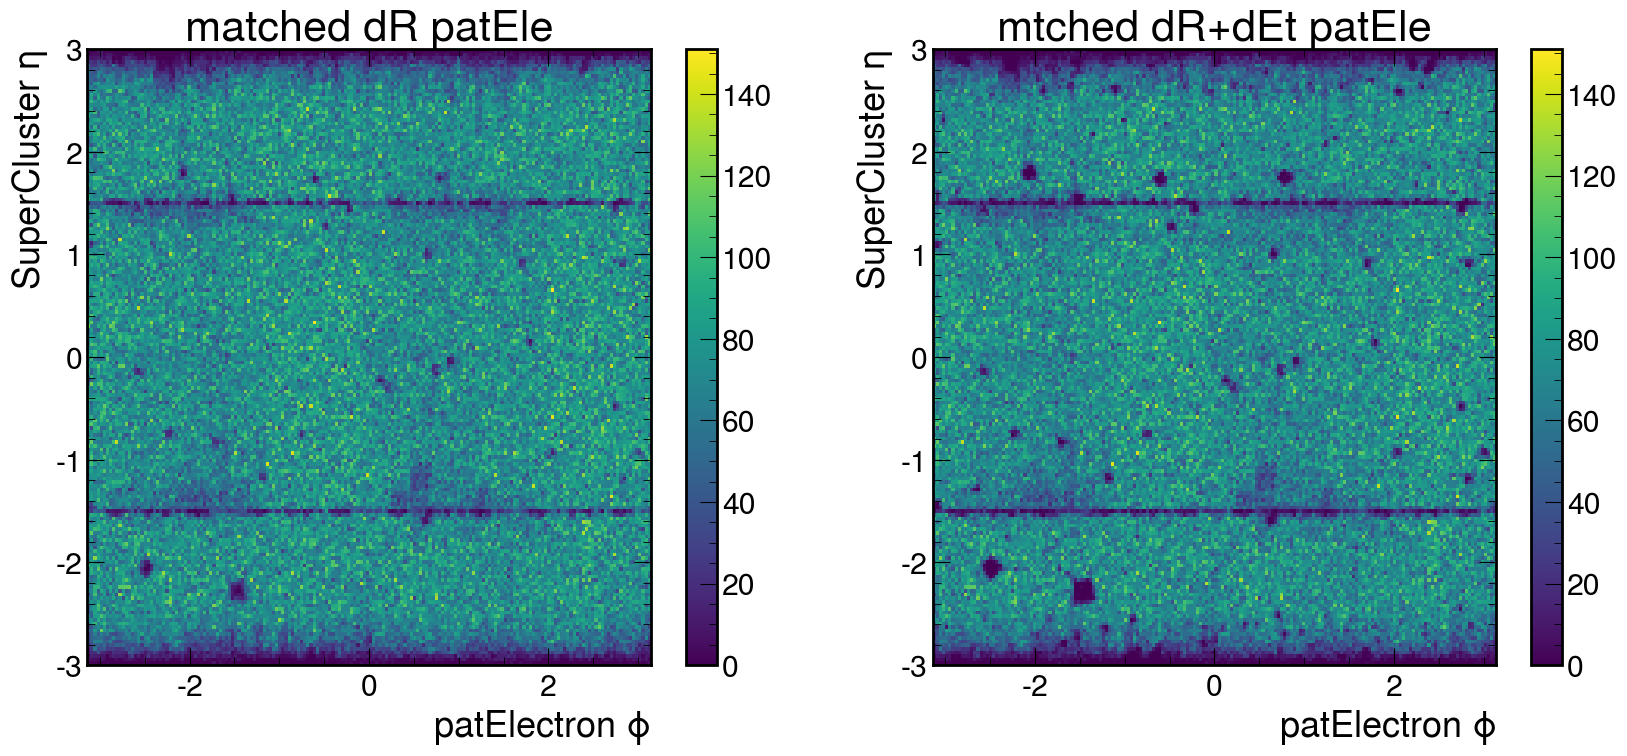

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

*b, C = ax1.hist2d(dfele.ele_phi, dfele.ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("matched dR patEle")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask].ele_phi, dfele[etmask].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("mtched dR+dEt patEle")

plt.colorbar(C, ax=ax2)

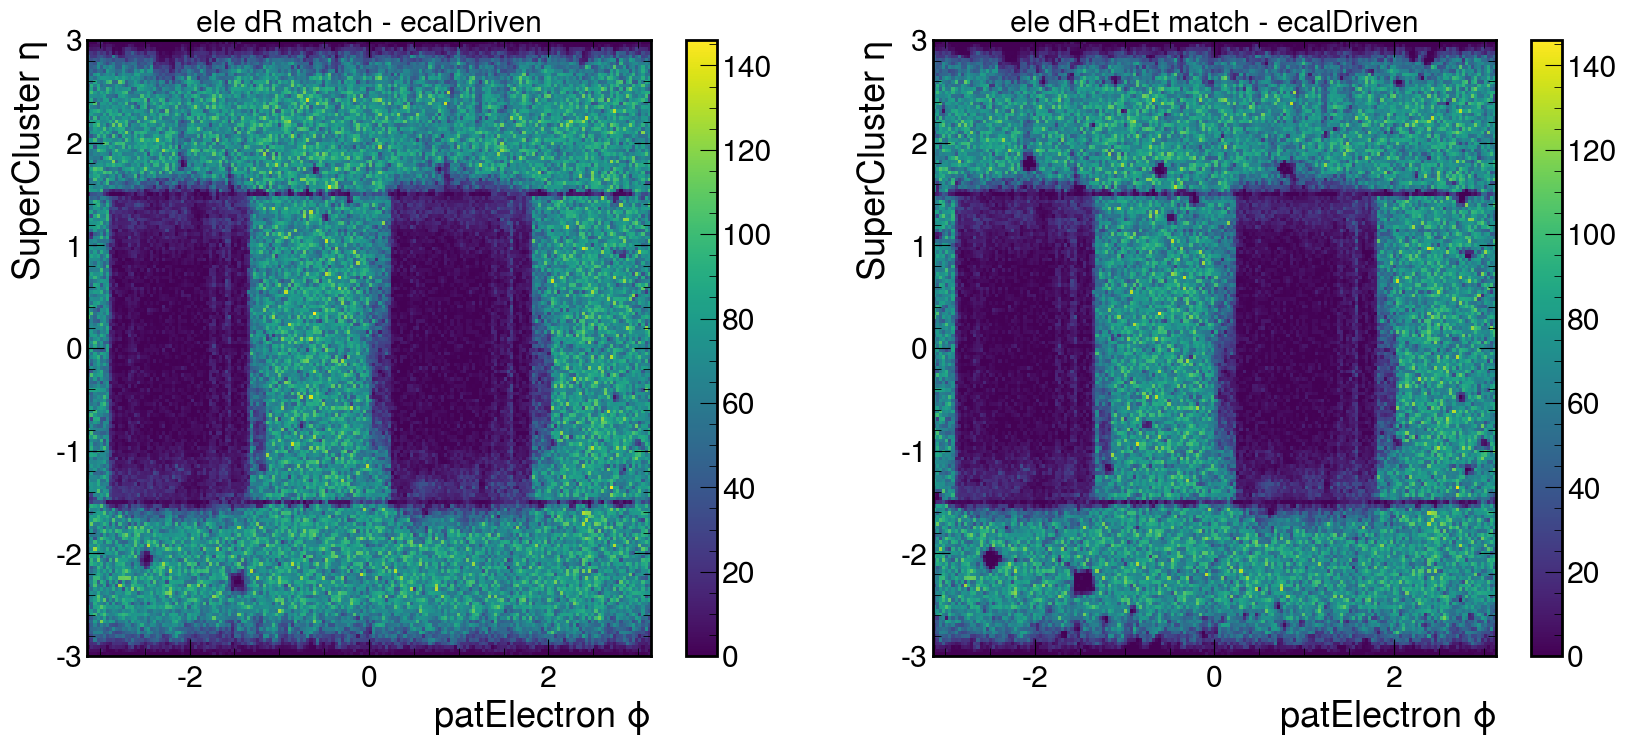

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ecalDriven = dfele.ele_isEcalDriven==1

*b, C = ax1.hist2d(dfele[ecalDriven].ele_phi, dfele[ecalDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - ecalDriven", fontsize="small")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask&ecalDriven].ele_phi, dfele[etmask&ecalDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("ele dR+dEt match - ecalDriven", fontsize="small")

plt.colorbar(C, ax=ax2)

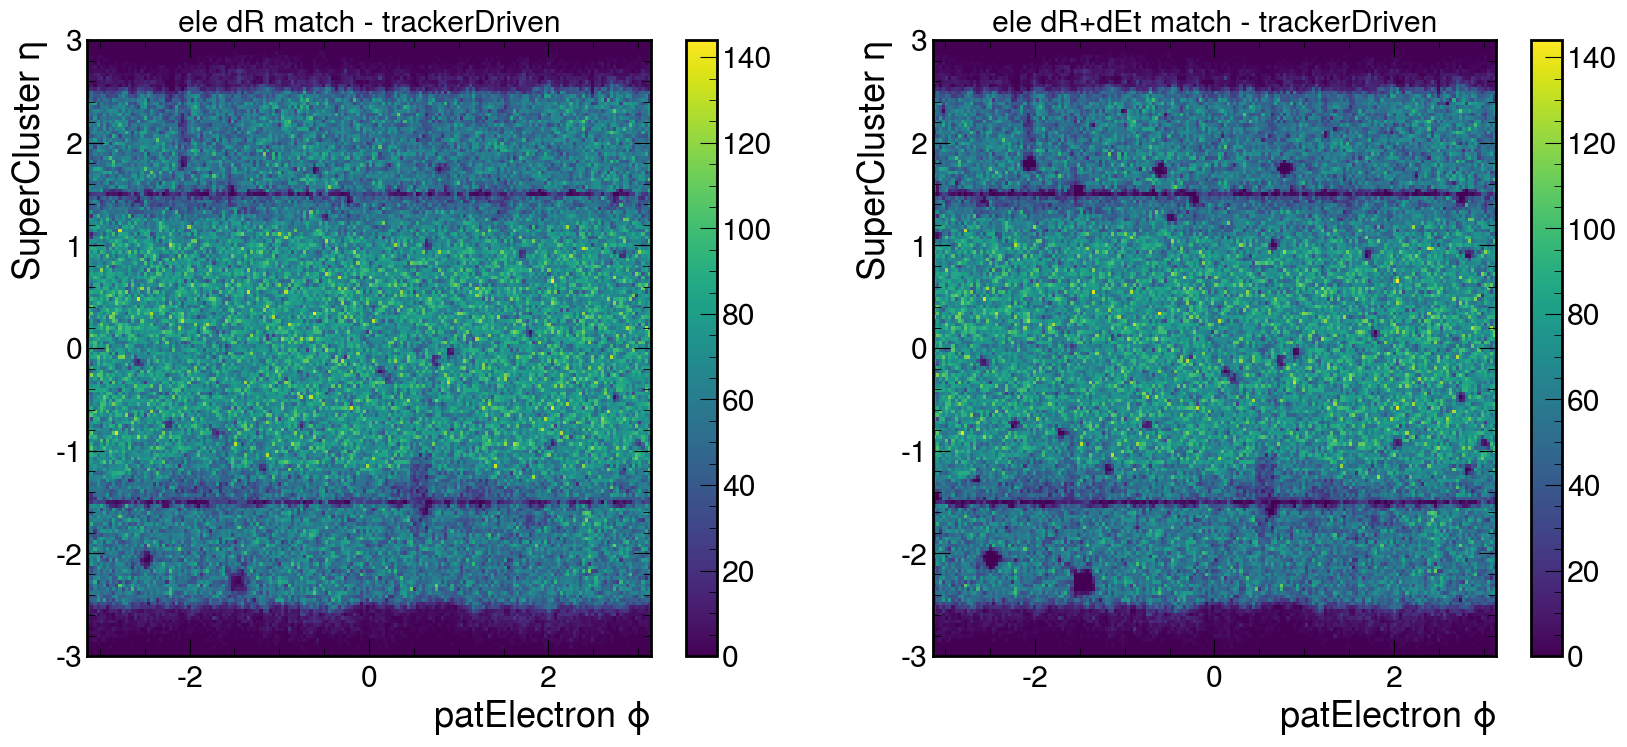

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

trackerDriven = dfele.ele_isTrackerDriven==1

*b, C = ax1.hist2d(dfele[trackerDriven].ele_phi, dfele[trackerDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax1.set_xlabel("patElectron $\phi$")
ax1.set_ylabel("SuperCluster $\eta$")
plt.colorbar(C, ax=ax1)
ax1.set_title("ele dR match - trackerDriven", fontsize="small")

etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)

*b, C = ax2.hist2d(dfele[etmask&trackerDriven].ele_phi, dfele[etmask&trackerDriven].ele_eta, bins=(180,170), range=((-np.pi, np.pi), (-3,3)))
ax2.set_xlabel("patElectron $\phi$")
ax2.set_ylabel("SuperCluster $\eta$")
ax2.set_title("ele dR+dEt match - trackerDriven", fontsize="small")

plt.colorbar(C, ax=ax2)

# Electron seeding type

Applying dR and 10% deltaEt matching

In [55]:
etmask = ((dfele.ele_et/ dfele.genpart_et)> 0.9)&((dfele.ele_et/ dfele.genpart_et)< 1.1)
dfm = dfele[etmask]

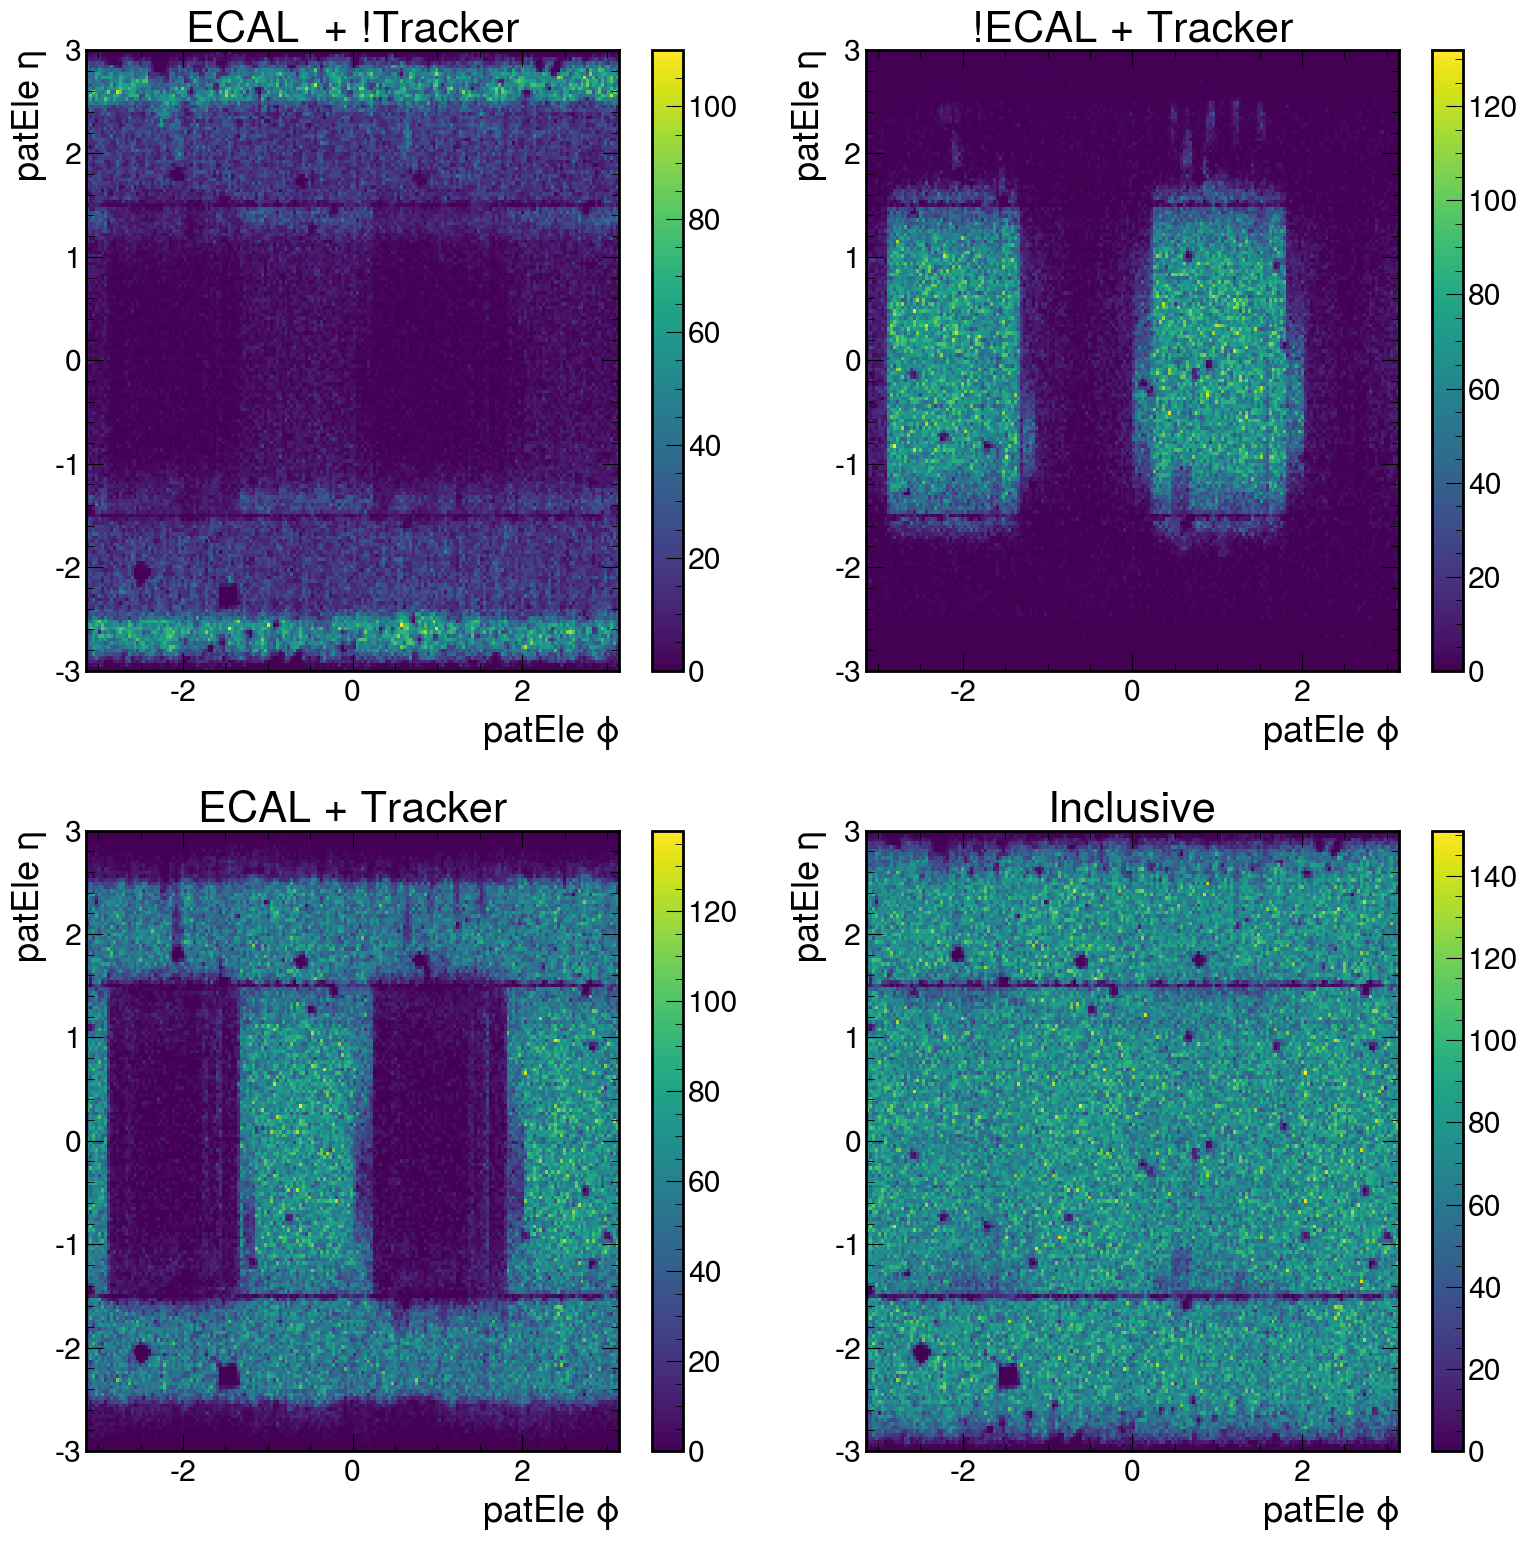

In [70]:
bins = (180, 170)
rrange = ((-np.pi, np.pi),(-3,3))

ecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

noecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

ecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

noecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

N_tot, xbins, ybins = np.histogram2d(dfm["ele_phi"],
                                    dfm["ele_eta"],
               bins=bins, range=rrange )


X, Y = np.meshgrid(xbins, ybins)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))

c1 = ax1.pcolormesh(X,Y, (ecal_notracker).T)
c2 = ax2.pcolormesh(X,Y, (noecal_tracker).T)
c3 = ax3.pcolormesh(X,Y, (ecal_tracker).T)
c4 = ax4.pcolormesh(X,Y, (N_tot).T)

ax1.set_ylabel("patEle $\eta$")
ax2.set_ylabel("patEle $\eta$")
ax3.set_ylabel("patEle $\eta$")
ax4.set_ylabel("patEle $\eta$")

ax1.set_xlabel("patEle $\phi$")
ax2.set_xlabel("patEle $\phi$")
ax3.set_xlabel("patEle $\phi$")
ax4.set_xlabel("patEle $\phi$")

ax1.set_title("ECAL  + !Tracker")
ax2.set_title("!ECAL + Tracker")
ax3.set_title("ECAL + Tracker")
ax4.set_title("Inclusive")


plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()


### Normalized to 1

/tmp/ipykernel_64513/442243854.py:29: RuntimeWarning: invalid value encountered in divide
  c1 = ax1.pcolormesh(X,Y, (ecal_notracker/N_tot).T, vmax=1, vmin=0)
/tmp/ipykernel_64513/442243854.py:30: RuntimeWarning: invalid value encountered in divide
  c2 = ax2.pcolormesh(X,Y, (noecal_tracker/N_tot).T,vmax=1, vmin=0)
/tmp/ipykernel_64513/442243854.py:31: RuntimeWarning: invalid value encountered in divide
  c3 = ax3.pcolormesh(X,Y, (ecal_tracker/N_tot).T,vmax=1, vmin=0)


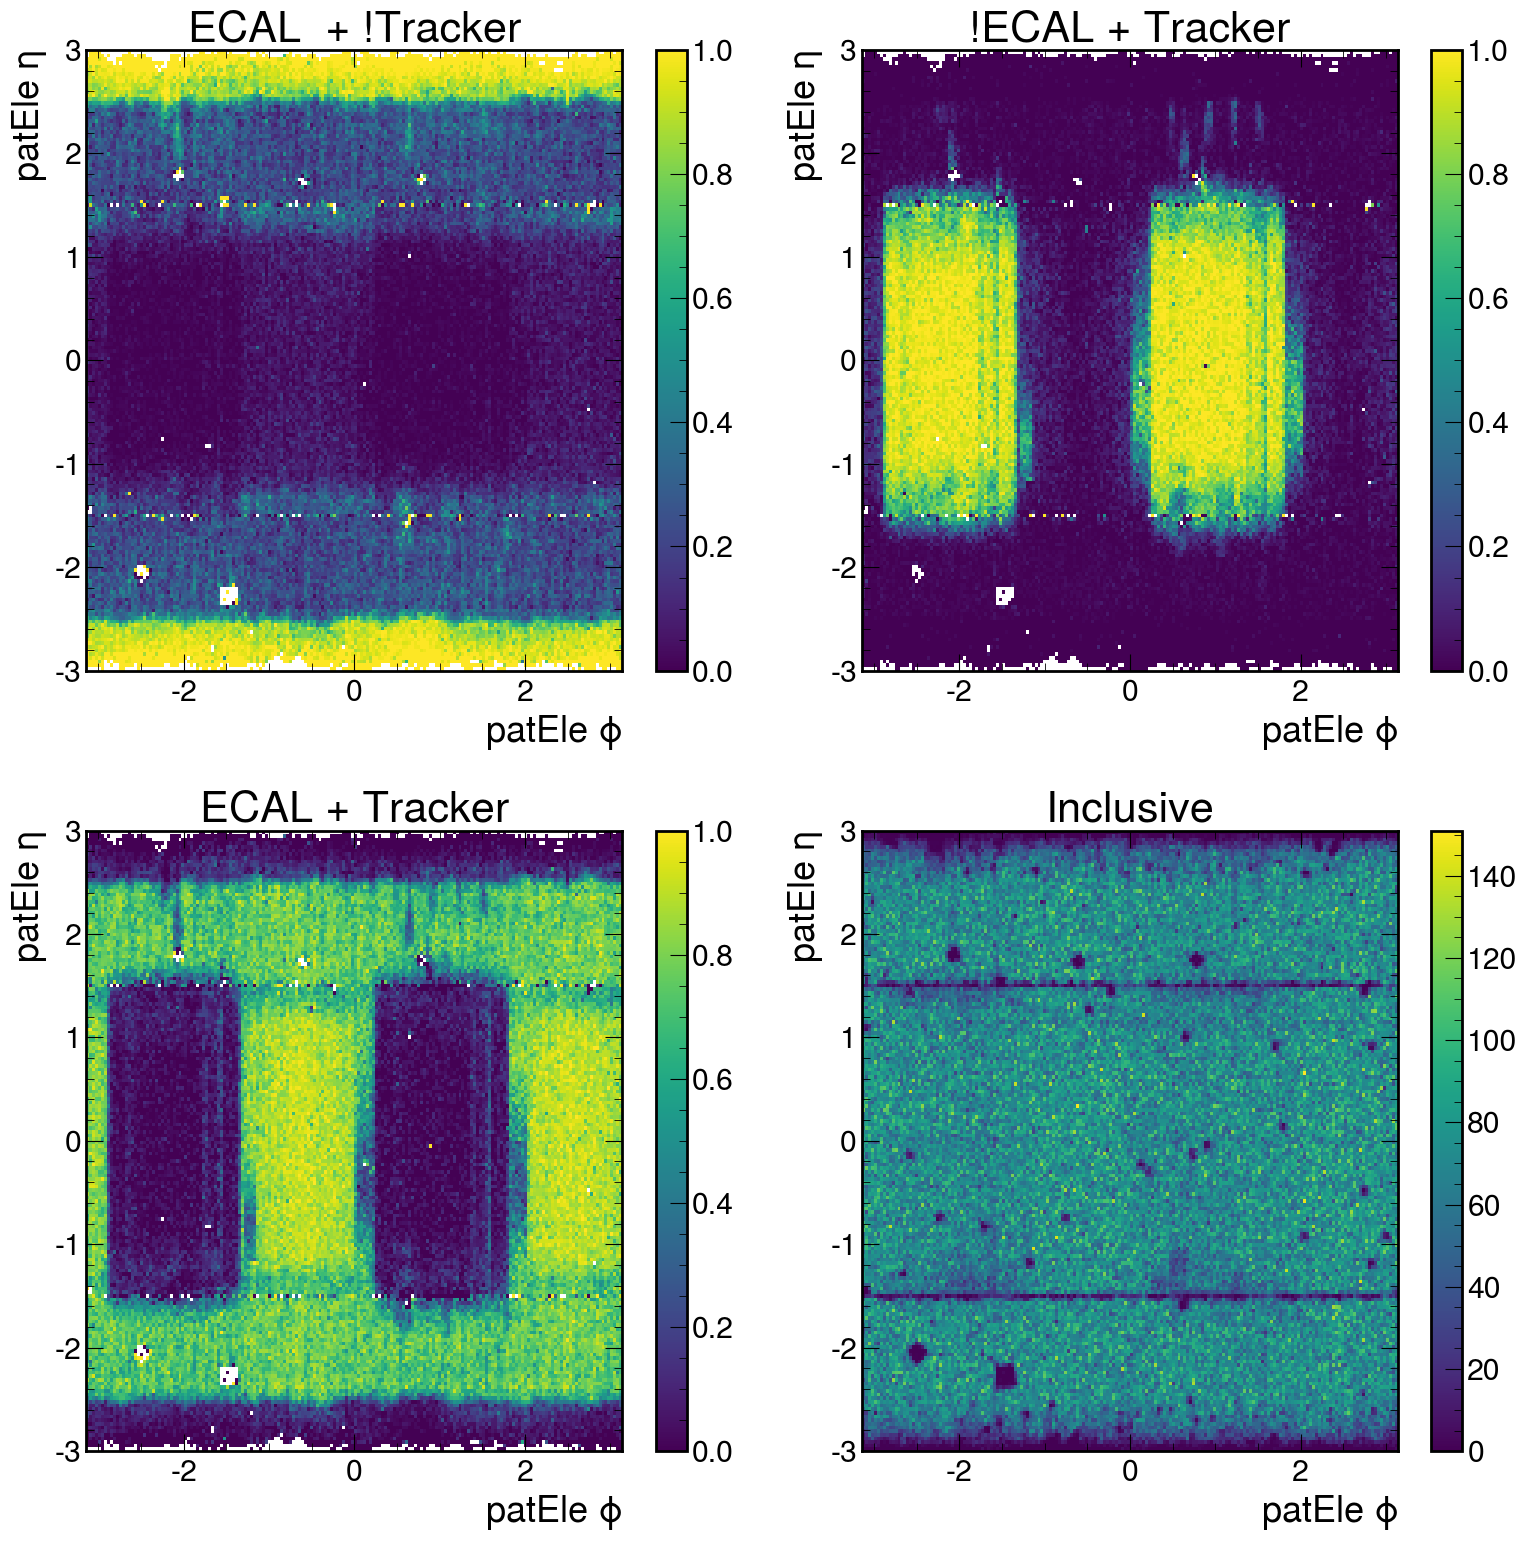

In [71]:
bins = (180, 170)
rrange = ((-np.pi, np.pi),(-3,3))

ecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

noecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
                                      dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

ecal_tracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==1)&(dfm.ele_isTrackerDriven==1)],
               bins=bins, range=rrange )

noecal_notracker, _, _ = np.histogram2d(dfm["ele_phi"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
                                    dfm["ele_eta"][(dfm.ele_isEcalDriven==0)&(dfm.ele_isTrackerDriven==0)],
               bins=bins, range=rrange )

N_tot, xbins, ybins = np.histogram2d(dfm["ele_phi"],
                                    dfm["ele_eta"],
               bins=bins, range=rrange )


X, Y = np.meshgrid(xbins, ybins)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,16))

c1 = ax1.pcolormesh(X,Y, (ecal_notracker/N_tot).T, vmax=1, vmin=0)
c2 = ax2.pcolormesh(X,Y, (noecal_tracker/N_tot).T,vmax=1, vmin=0)
c3 = ax3.pcolormesh(X,Y, (ecal_tracker/N_tot).T,vmax=1, vmin=0)
c4 = ax4.pcolormesh(X,Y, (N_tot).T)

ax1.set_ylabel("patEle $\eta$")
ax2.set_ylabel("patEle $\eta$")
ax3.set_ylabel("patEle $\eta$")
ax4.set_ylabel("patEle $\eta$")

ax1.set_xlabel("patEle $\phi$")
ax2.set_xlabel("patEle $\phi$")
ax3.set_xlabel("patEle $\phi$")
ax4.set_xlabel("patEle $\phi$")

ax1.set_title("ECAL  + !Tracker")
ax2.set_title("!ECAL + Tracker")
ax3.set_title("ECAL + Tracker")
ax4.set_title("Inclusive")


plt.colorbar(c1, ax=ax1)
plt.colorbar(c2, ax=ax2)
plt.colorbar(c3, ax=ax3)
plt.colorbar(c4, ax=ax4)
plt.tight_layout()
